In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [52]:
trainset = pd.read_csv(r"C:\Users\91976\Desktop\programming\AI and Ml\projects\survival predicton\housing risk\train.csv")
print(trainset.shape)
print(trainset.shape[0] * trainset.shape[1])

(499, 122)
60878


missing values

In [54]:
nan_features = [features for features in trainset.columns if trainset[features].isnull().sum()>=1]
print(nan_features)
print(len(nan_features))

['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREM

numerical features

In [55]:
num_features = [features for features in trainset.columns if trainset[features].dtype!='O']
print(num_features)
print(len(num_features))

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEAR

In [56]:
discrete_features = [features for features in num_features if len(trainset[features].unique())<=6 ]

print(discrete_features)
print(len(discrete_features))

['TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT']
43


In [42]:
continous_features = [features for features in num_features if features not in discrete_features]
print(continous_features)
print(len(continous_features))

['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVA

In [43]:
'''
for features in continous_features:
    data = trainset.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()
'''    

'\nfor features in continous_features:\n    data = trainset.copy()\n    data[features].hist(bins=25)\n    plt.xlabel(features)\n    plt.ylabel("count")\n    plt.title(features)\n    plt.show()\n'

categorical features

In [57]:
categorical_features = [features for features in trainset.columns if trainset[features].dtype=='O']
print(categorical_features)
print(len(categorical_features))

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
16


# Feature Engineering

In [60]:
n_features_na = [features for features in trainset.columns if trainset[features].isnull().sum()>=1 and trainset[features].dtype!='O']

for features in n_features_na:
    print(f"{features}: {np.round(trainset[features].isnull().mean(),4)}% missing values")

print(len(n_features_na))

AMT_GOODS_PRICE: 0.002% missing values
EXT_SOURCE_2: 0.004% missing values
EXT_SOURCE_3: 0.2064% missing values
OBS_30_CNT_SOCIAL_CIRCLE: 0.006% missing values
DEF_30_CNT_SOCIAL_CIRCLE: 0.006% missing values
OBS_60_CNT_SOCIAL_CIRCLE: 0.006% missing values
DEF_60_CNT_SOCIAL_CIRCLE: 0.006% missing values
AMT_REQ_CREDIT_BUREAU_HOUR: 0.1263% missing values
AMT_REQ_CREDIT_BUREAU_DAY: 0.1263% missing values
AMT_REQ_CREDIT_BUREAU_WEEK: 0.1263% missing values
AMT_REQ_CREDIT_BUREAU_MON: 0.1263% missing values
AMT_REQ_CREDIT_BUREAU_QRT: 0.1263% missing values
AMT_REQ_CREDIT_BUREAU_YEAR: 0.1263% missing values
13


In [59]:
for features in n_features_na:
    if np.round(trainset[features].isnull().mean(),4) > 0.3:
        trainset = trainset.drop(features, axis=1)
        

In [47]:
print(len(n_features_na))

61


In [61]:
for features in n_features_na:
    median_values = trainset[features].median()
    trainset[features] = trainset[features].fillna(median_values)


# for checking nan values

print(trainset[n_features_na].isnull().sum()) 

AMT_GOODS_PRICE               0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64


<AxesSubplot:>

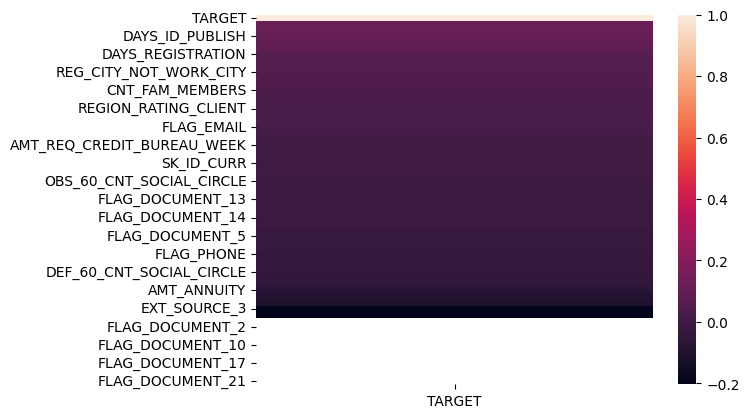

In [62]:
corr = trainset.corr()[['TARGET']].sort_values(
    by='TARGET', ascending=False)

sns.heatmap(corr)



In [64]:
trainset['CODE_GENDER'] = trainset['CODE_GENDER'].replace({'M':0,'F':1})
trainset['NAME_EDUCATION_TYPE'] = trainset['NAME_EDUCATION_TYPE'].replace({'Secondary / secondary special':0 , 'Higher education':1 , 'Incomplete higher':2, 'Lower secondary':3})

trainset['NAME_FAMILY_STATUS'] = trainset['NAME_FAMILY_STATUS'].replace({'Married':0 , 'Single / not married':1 , 'Civil marriage':2 ,'Separated':3 , 'Widow':4})
trainset['NAME_HOUSING_TYPE'] = trainset['NAME_HOUSING_TYPE'].replace({'House / apartment':0 , 'With parents':1 , 'Municipal apartment':2 , 'Rented apartment':3 , 'Office apartment' : 4 , 'Co-op apartment':5})

# Model selection

In [65]:
t_x = trainset[['CODE_GENDER' , 'CNT_CHILDREN' , 'AMT_INCOME_TOTAL' , 'NAME_EDUCATION_TYPE' , 'NAME_FAMILY_STATUS' , 'NAME_HOUSING_TYPE']]
t_y = trainset['TARGET']

t_x = t_x.drop([col for col in t_x.columns if t_x[col].eq('XNA').any()], axis=1)
t_x = t_x.drop([col for col in t_x.columns if t_x[col].eq('Unknown').any()], axis=1)

In [71]:
from sklearn.model_selection import  train_test_split

train_x,test_x,train_y,test_y = train_test_split(t_x,t_y,train_size = 0.8)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

train_x.head()


(399, 6)
(399,)
(100, 6)
(100,)


,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
318,1,1,157500.0,0,0,0
333,0,0,135000.0,0,2,1
125,0,2,180000.0,1,0,1
224,1,1,90000.0,0,0,0
126,1,0,112500.0,0,2,3


In [67]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [68]:
model = Pipeline([
        ('scalar',MinMaxScaler()),
        ('tech', RandomForestClassifier())

])

model.fit(train_x,train_y)


Pipeline(steps=[('scalar', MinMaxScaler()), ('tech', RandomForestClassifier())])

In [69]:
pred = model.predict(test_x)

acc =  accuracy_score(pred,test_y)
print(acc)



0.95


In [70]:
import pickle 

with open('hr.pkl','wb') as file:
    pickle.dump(model,file)